# Introdução aos métodos discretos

Nome: WELSON DE AVELAR SOARES FILHO

# Lista 11
### 1) Realizar a interpolação linear por partes para a função $f(x) = 2x\sin(2\pi x) + 3$.

In [4]:
import numpy as np, matplotlib.pyplot as plt

from math import sin, pi

(a) Definir a função a ser aproximada.

In [5]:
def f(x):
  return 2*x*np.sin(2*x*np.pi) + 3

(b) Definir as funções base chapéu:
$\varphi_i= \begin{cases}\left(x-x_{i-1}\right) / h_i, & \text { se } x \in I_i \\ \left(x_{i+1}-x\right) / h_{i+1}, & \text { se } x \in I_{i+1} \\ 0, & \text { caso contrário }\end{cases}$

Os parâmetros são o índice da função a ser avaliada, as coordenadas x dos nós e o ponto z onde a função será avaliada.

Por definição, $I$ é:

$I = [x_{i-1}, x_i]$

e $h$ é dado como:

$h_i = x_i - x_{i-1}$

In [6]:
def phi(i, x, z):
    if i == 0:
      if z >= x[i] and z <= x[i+1]:
        return (x[i+1] - z) / (x[i+1] - x[i])
      else:
        return 0
      
    elif i == len(x)-1:
      if z <= x[i] and z >= x[i-1]:
        return (z - x[i-1]) / (x[i] - x[i-1])
      else:
        return 0
      
    else:
      if z <= x[i] and z >= x[i-1]:
        return (z - x[i-1]) / (x[i] - x[i-1])
      elif z >= x[i] and z <= x[i+1]:
        return (x[i+1] - z) / (x[i+1] - x[i])
      else:
        return 0

(c) Definir o polinômio interpolador, dadas as coordenadas x e y dos nós e o ponto z a ser avaliado pelo polinômio.
	$$
	P(x)=\sum_{i=1}^n f\left(x_i\right) \varphi_i(x)
	$$

$P(n)$:

\begin{equation*}
  P_n =
  \begin{bmatrix}
1 & x_0 & x^2_0 & ... & x^n_0\\
1 & x_1 & x^2_1 & ... & x^n_1\\
... &  & ... & ... &...\\
1 & x_n & x^2_n & ... & x^n_n
\end{bmatrix}
\end{equation*}

Sendo que $n$ é o número de (nós - 1)

In [8]:
def poly_eval(x, y, z):
    P = 0
    for i in range(len(x)):
      P = P + y[i]*phi(i, x, z)
    return P

(d) Plotar o gráfico do polinômio considerando 6, 10, 15 e 20 nós. Plotar também os nós e a função que está sendo aproximada, conforme exemplo abaixo.

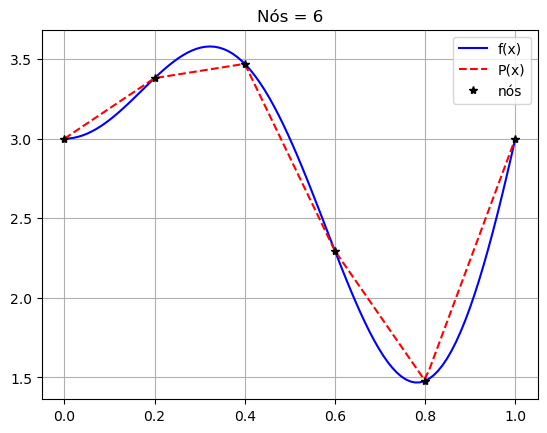

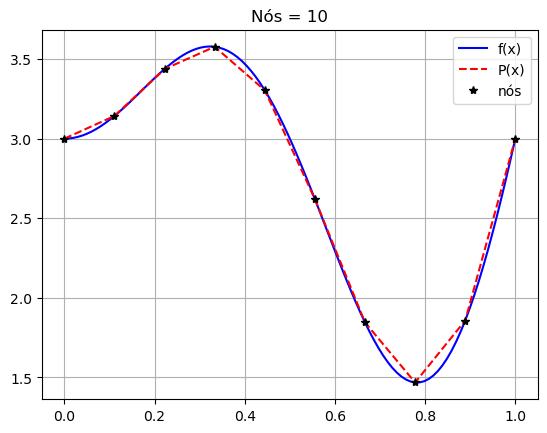

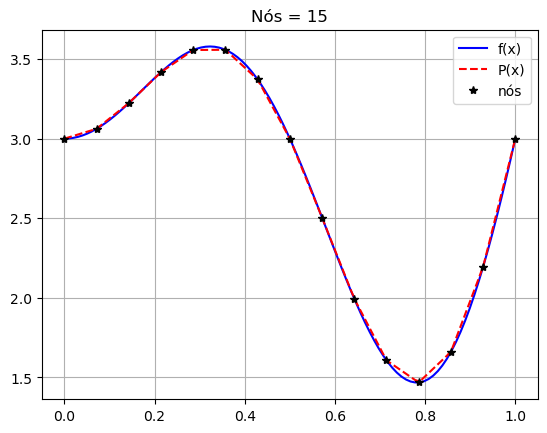

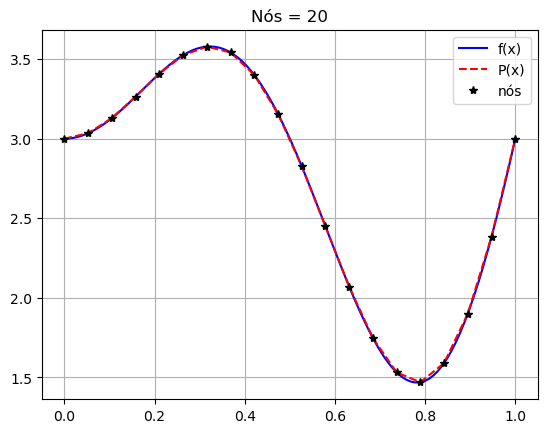

In [9]:
# nós
n = np.array([6, 10, 15, 20])

for i in range(len(n)):
  x = np.linspace(0, 1, n[i])
  
  # função avaliada nos nós
  y = f(x)

  # nós a avaliar a aproximação
  xx = np.linspace(0, 1, 100)
  
  # avalia interpolação
  yy = []
  for xp in xx:
    yy.append(poly_eval(x, y, xp))
  
  # plota gráficos
  plt.plot(xx, f(xx), '-', label='f(x)', color='blue')
  plt.plot(xx, yy, '--', label='P(x)', color='red')
  plt.plot(x, y, '*', label='nós', color='black')
  plt.title("Nós = "+format(str(n[i])))
  plt.legend()
  plt.grid()
  plt.show()